# `panCleave`: Performance disaggregated by protease

*Prepared by Jacqueline R. M. A. Maasch* | *June 2022*

## Preamble

In [39]:
%cd "../scripts/"

# Importations.
import pancleave
import pandas as pd
import sys
import time
from sklearn.model_selection import train_test_split
from ast import literal_eval
import numpy as np  # Import for version test only; only used internal to pancleave.
import Bio          # Import for version test only; only used internal to pancleave.

# View versions.
print("\nCurrent version of python:", sys.version)
print("\nCurrent version of pandas:", pd.__version__)
print("\nCurrent version of numpy:", np.__version__)
print("\nCurrent version of biopython:", Bio.__version__, "\n")

# NOTE: View full requirements file @ requirements.txt.
# !pip freeze > requirements.txt

/Users/jacquelinemaasch/Desktop/machineBiology/pancleave/scripts

Current version of python: 3.10.2 (v3.10.2:a58ebcc701, Jan 13 2022, 14:50:16) [Clang 13.0.0 (clang-1300.0.29.30)]

Current version of pandas: 1.4.1

Current version of numpy: 1.22.2

Current version of biopython: 1.79 



In [40]:
%%capture
'''
JM's machine:

Current version of python: 3.8.3 (default, Jul  2 2020, 11:26:31) [Clang 10.0.0 ]
Current version of pandas: 1.0.5
Current version of numpy: 1.18.5
Current version of biopython: 1.78
'''

## Process data

In [41]:
#############
# Read data
#############

# Read data files.
path = "/Users/jacquelinemaasch/Desktop/machineBiology/pancleave_dev_1/data_files/"
df = pd.read_csv(path + "training_testing/training_testing_multiple_encoding.csv")

# Explore.
display(df.head(2))
print(df.info())

######################
# Data preprocessing
######################

#####################
# Train-test split
#####################

# Set random state for reproducibility.
seed = 5

# Train-test split (80% / 20%) on binary one-hot.
X = df.copy()
y = df[["Label"]].copy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = seed,
                                                    stratify = y)

# Explore data.
print("\n~~~~~~~~~~~~~~ SPLIT DATA EXPLORATION ~~~~~~~~~~~~~~\n")
print("Full dataframe information:\n", df.info())
print("\nTraining features:", X_train.shape)
print("Training labels:", y_train.shape)
print("\nTest features:", X_test.shape)
print("Test labels:", y_test.shape)

counts_y_train = y_train["Label"].value_counts()
print("\nTraining set positive / negative counts:")
print(counts_y_train)

counts_y_test = y_test["Label"].value_counts()
print("\nTest set positive / negative counts:")
print(counts_y_test)
print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

Sequence  Augmented     Label                        Ordinal  \
0  RGRRAEPQ      False  Positive  [14, 5, 14, 14, 0, 3, 12, 13]   
1  AEFTTNLT      False  Positive   [0, 3, 4, 16, 16, 11, 9, 16]   

                                             One-hot  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...   
1  [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                        One-hot flat  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   
1  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                             Z-scale  \
0  [[2.88, 2.52, -3.44], [2.23, -5.36, 0.3], [2.8...   
1  [[0.07, -1.73, 0.09], [3.08, 0.39, -0.07], [-4...   

                                        Z-scale flat  \
0  [2.88, 2.52, -3.44, 2.23, -5.36, 0.3, 2.88, 2....   
1  [0.07, -1.73, 0.09, 3.08, 0.39, -0.07, -4.92, ...   

                                            ST-scale  \
0  [[-0.059, 0.731, -0.013, -0.096, -0.253, 0.3, ...   
1  [[-1.552, -0.791, -0.627, 0.237, -0.461, -2.22...   

                                       ST-scale flat  \
0  [-0.059, 0.731, -0.013, -0.096, -0.253, 0.3, 1...   
1  [-1.552, -0.791, -0.627, 0.237, -0.461, -2.229...   

                                            FP-scale  \
0  [[-2.79, 6.6, 1.21, 2.07, 1.67, 0.76, 0.0, 0.3...   
1  [[-0.1, -4.94, -2.13, 1.7, -0.39, 1.06, -1.39,...   

                                       FP-scale flat  \
0  [-2.79, 6.6, 1.21, 2.07, 1.67, 0.76, 0.0, 0.32...   
1  [-0.1, -4.94, -2.13, 1.7, -0.39, 1.06, -1.39, ...   

                                              UniRep  
0  [-0.07988756895065308, 0.10797376185655594, 0....  
1  [-0.10695181787014008, 0.09345480799674988, -0...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49634 entries, 0 to 49633
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sequence       49634 non-null  object
 1   Augmented      49634 non-null  bool  
 2   Label          49634 non-null  object
 3   Ordinal        49634 non-null  object
 4   One-hot        49634 non-null  object
 5   One-hot flat   49634 non-null  object
 6   Z-scale        49634 non-null  object
 7   Z-scale flat   49634 non-null  object
 8   ST-scale       49634 non-null  object
 9   ST-scale flat  49634 non-null  object
 10  FP-scale       49634 non-null  object
 11  FP-scale flat  49634 non-null  object
 12  UniRep         49634 non-null  object
dtypes: bool(1), object(12)
memory usage: 4.6+ MB
None

~~~~~~~~~~~~~~ SPLIT DATA EXPLORATION ~~~~~~~~~~~~~~

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49634 entries, 0 to 49633
Data columns (total 13 columns):
 #   Column         Non-Nul

In [42]:
# Export training and testing data.
df_train = X_train.copy()
df_train["Label"] = y_train
df_train = df_train[["Sequence", "Label"]].reset_index(drop = True)
df_train.to_csv("pancleave_train.csv", index = False)

df_test = X_test.copy()
df_test["Label"] = y_test
df_test = df_test[["Sequence", "Label"]].reset_index(drop = True)
df_test.to_csv("pancleave_test.csv", index = False)

print(df_train.info())
display(df_train.head())

print(df_test.info())
display(df_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39707 entries, 0 to 39706
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sequence  39707 non-null  object
 1   Label     39707 non-null  object
dtypes: object(2)
memory usage: 620.5+ KB
None


Sequence     Label
0  ERFLGPEI  Positive
1  FLFYKEGI  Positive
2  LGYPIKAP  Positive
3  KEAFSLFD  Positive
4  DKILGCDW  Positive

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9927 entries, 0 to 9926
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sequence  9927 non-null   object
 1   Label     9927 non-null   object
dtypes: object(2)
memory usage: 155.2+ KB
None


Sequence     Label
0  CVSCTKTF  Negative
1  PFMTGAAE  Positive
2  GTVKAENG  Positive
3  TSYQCSPW  Negative
4  RIISANGC  Positive

### Import MEROPS protease data

In [43]:
# Import MEROPS data.
path_merops = "/Users/jacquelinemaasch/Desktop/machineBiology/pancleave_dev_1/data_files/"
df_protease = pd.read_csv(path + "protein_database_data/merops_preprocessed.csv")

print(df_protease.info())
display(df_protease.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40223 entries, 0 to 40222
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Substrate                       40223 non-null  object
 1   Substrate Uniprot accession ID  38309 non-null  object
 2   P4:P4'                          40222 non-null  object
 3   Peptidase MEROPS ID             40223 non-null  object
 4   Peptidase family                40223 non-null  object
 5   Peptidase clan                  40223 non-null  object
 6   Peptidase type                  40223 non-null  object
dtypes: object(7)
memory usage: 2.1+ MB
None


Substrate Substrate Uniprot accession ID    P4:P4'  \
0  alcohol dehydrogenase                         P00334  TLTNKNVI   
1  alcohol dehydrogenase                         P00334  TNKNVIFV   
2  alcohol dehydrogenase                         P00334  NVIFVAGL   
3  alcohol dehydrogenase                         P00334  GLGGIGLD   
4  alcohol dehydrogenase                         P00334  GGIGLDTS   

  Peptidase MEROPS ID Peptidase family Peptidase clan          Peptidase type  
0             A01.001               A1             AA  Aspartic (A) Peptidase  
1             A01.001               A1             AA  Aspartic (A) Peptidase  
2             A01.001               A1             AA  Aspartic (A) Peptidase  
3             A01.001               A1             AA  Aspartic (A) Peptidase  
4             A01.001               A1             AA  Aspartic (A) Peptidase

### Merge protease and test data

In [44]:
# Merge positive test data with protease data using only test data keys.
df_positive = df_test[df_test["Label"] == "Positive"]
df_merge = df_positive.merge(df_protease,
                             left_on = "Sequence", 
                             right_on = "P4:P4'", 
                             how = "left")
print(len(df_positive))
print(df_merge.info())
display(df_merge.head())

4964
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7008 entries, 0 to 7007
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Sequence                        7008 non-null   object
 1   Label                           7008 non-null   object
 2   Substrate                       7008 non-null   object
 3   Substrate Uniprot accession ID  6945 non-null   object
 4   P4:P4'                          7008 non-null   object
 5   Peptidase MEROPS ID             7008 non-null   object
 6   Peptidase family                7008 non-null   object
 7   Peptidase clan                  7008 non-null   object
 8   Peptidase type                  7008 non-null   object
dtypes: object(9)
memory usage: 547.5+ KB
None


Sequence     Label                                 Substrate  \
0  PFMTGAAE  Positive  Translationally-controlled tumor protein   
1  GTVKAENG  Positive  Glyceraldehyde-3-phosphate dehydrogenase   
2  GTVKAENG  Positive  Glyceraldehyde-3-phosphate dehydrogenase   
3  GTVKAENG  Positive  Glyceraldehyde-3-phosphate dehydrogenase   
4  GTVKAENG  Positive  Glyceraldehyde-3-phosphate dehydrogenase   

  Substrate Uniprot accession ID    P4:P4' Peptidase MEROPS ID  \
0                         P13693  PFMTGAAE             C01.034   
1                         P04406  GTVKAENG             C01.009   
2                         P04406  GTVKAENG             C01.032   
3                         P04406  GTVKAENG             C01.034   
4                         P04406  GTVKAENG             C01.036   

  Peptidase family Peptidase clan          Peptidase type  
0               C1             CA  Cysteine (C) Peptidase  
1               C1             CA  Cysteine (C) Peptidase  
2               C1             CA  Cysteine (C) Peptidase  
3               C1             CA  Cysteine (C) Peptidase  
4               C1             CA  Cysteine (C) Peptidase

In [45]:
print("-- TYPE --")
print(df_merge["Peptidase type"].value_counts())
print("\n-- CLAN --")
print(df_merge["Peptidase clan"].value_counts())
print("\n-- FAMILY --")
print(df_merge["Peptidase family"].value_counts())

-- TYPE --
Cysteine (C) Peptidase     3143
Metallo (M) Peptidase      1794
Serine (S) Peptidase       1407
Aspartic (A) Peptidase      609
Threonine (T) Peptidase      55
Name: Peptidase type, dtype: int64

-- CLAN --
CA    2138
MA    1750
PA    1138
CD     997
AA     601
SB     184
SF      73
PB      55
ME      39
AD       8
CE       5
SJ       4
SC       4
M-       3
PD       2
SR       2
ST       1
SK       1
MP       1
MM       1
PC       1
Name: Peptidase clan, dtype: int64

-- FAMILY --
C1     1975
M10    1297
S1     1138
A1      600
C14     564
C13     433
M12     420
S8      184
C2      146
S26      73
T1       54
M16      39
M13      26
A22       8
C19       8
C48       5
M3        5
S16       4
S9        4
M87       3
C64       2
S60       2
C46       2
C85       2
C65       2
C78       2
C54       1
S14       1
M41       1
A28       1
T2        1
M67       1
M50       1
C56       1
M2        1
S54       1
Name: Peptidase family, dtype: int64


## Execute pipeline on test data

In [46]:
# Init pipeline object.
panCleave = pancleave.Pipeline()

In [47]:
%cd "../model/"

# Execute full pipeline on raw sequences.
# Pipeline includes ProtFP sequence encoding and cleavage prediction.
start_time = time.time()
df_cleave = panCleave.execute_pipeline(df_merge["Sequence"])
print("Pipeline executed in {} seconds.\n".format(time.time() - start_time))

# View output dataframe.
display(df_cleave)

/Users/jacquelinemaasch/Desktop/machineBiology/pancleave/model
Pipeline executed in 3072.989112854004 seconds.



Sequence       Sites Predictions         Probabilities     Fragments
0     PFMTGAAE  [PFMTGAAE]  [Positive]  [0.5184955033786304]  [PFMT, GAAE]
1     GTVKAENG  [GTVKAENG]  [Positive]  [0.7259568286460703]  [GTVK, AENG]
2     GTVKAENG  [GTVKAENG]  [Positive]  [0.7259568286460703]  [GTVK, AENG]
3     GTVKAENG  [GTVKAENG]  [Positive]  [0.7259568286460703]  [GTVK, AENG]
4     GTVKAENG  [GTVKAENG]  [Positive]  [0.7259568286460703]  [GTVK, AENG]
...        ...         ...         ...                   ...           ...
7003  DRVGQDLP  [DRVGQDLP]  [Positive]  [0.5623736263521478]  [DRVG, QDLP]
7004  DRVGQDLP  [DRVGQDLP]  [Positive]  [0.5623736263521478]  [DRVG, QDLP]
7005  KKLLVGSE  [KKLLVGSE]  [Positive]  [0.7077371079964924]  [KKLL, VGSE]
7006  VFSVDEFS  [VFSVDEFS]  [Negative]  [0.7919719389269929]          None
7007  TFAGLCHQ  [TFAGLCHQ]  [Negative]  [0.5211495479322875]          None

[7008 rows x 5 columns]

## Evaluate by protease

In [48]:
# Merge protease data back in.
df_cleave_subset = df_cleave[["Sequence", "Predictions", "Probabilities"]].copy()
df_cleave_subset.columns = ["Sequence", "Prediction", "Probability"]
df_cleave_subset["Prediction"] = df_cleave_subset["Prediction"].map(lambda x: x[0])
df_cleave_subset["Probability"] = df_cleave_subset["Probability"].map(lambda x: x[0])
#df_merge = df_merge.drop(columns = ["Substrate Uniprot accession ID"])
df_protease_pred = df_cleave_subset.merge(df_merge, 
                                          left_on = "Sequence",
                                          right_on = "Sequence", 
                                          how = "right")
print(df_protease_pred.info())
display(df_protease_pred.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17724 entries, 0 to 17723
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Sequence                        17724 non-null  object 
 1   Prediction                      17724 non-null  object 
 2   Probability                     17724 non-null  float64
 3   Label                           17724 non-null  object 
 4   Substrate                       17724 non-null  object 
 5   Substrate Uniprot accession ID  17602 non-null  object 
 6   P4:P4'                          17724 non-null  object 
 7   Peptidase MEROPS ID             17724 non-null  object 
 8   Peptidase family                17724 non-null  object 
 9   Peptidase clan                  17724 non-null  object 
 10  Peptidase type                  17724 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.6+ MB
None


Sequence Prediction  Probability     Label  \
0  PFMTGAAE   Positive     0.518496  Positive   
1  GTVKAENG   Positive     0.725957  Positive   
2  GTVKAENG   Positive     0.725957  Positive   
3  GTVKAENG   Positive     0.725957  Positive   
4  GTVKAENG   Positive     0.725957  Positive   

                                  Substrate Substrate Uniprot accession ID  \
0  Translationally-controlled tumor protein                         P13693   
1  Glyceraldehyde-3-phosphate dehydrogenase                         P04406   
2  Glyceraldehyde-3-phosphate dehydrogenase                         P04406   
3  Glyceraldehyde-3-phosphate dehydrogenase                         P04406   
4  Glyceraldehyde-3-phosphate dehydrogenase                         P04406   

     P4:P4' Peptidase MEROPS ID Peptidase family Peptidase clan  \
0  PFMTGAAE             C01.034               C1             CA   
1  GTVKAENG             C01.009               C1             CA   
2  GTVKAENG             C01.009               C1             CA   
3  GTVKAENG             C01.009               C1             CA   
4  GTVKAENG             C01.009               C1             CA   

           Peptidase type  
0  Cysteine (C) Peptidase  
1  Cysteine (C) Peptidase  
2  Cysteine (C) Peptidase  
3  Cysteine (C) Peptidase  
4  Cysteine (C) Peptidase

In [144]:
# ALL DATA:
print("Total peptidase types:", len(df_protease["Peptidase type"].unique()))
print("Total peptidase clans:", len(df_protease["Peptidase clan"].unique()))
print("Total peptidase families:", len(df_protease["Peptidase family"].unique()))
print("Total peptidases:", len(df_protease["Peptidase MEROPS ID"].unique()))
df_protease["Peptidase type"].unique()

Total peptidase types: 6
Total peptidase clans: 31
Total peptidase families: 73
Total peptidases: 369


array(['Aspartic (A) Peptidase', 'Cysteine (C) Peptidase',
       'Metallo (M) Peptidase', 'Serine (S) Peptidase',
       'Mixed (P) Peptidases', 'Threonine (T) Peptidase'], dtype=object)

In [145]:
# TEST SET:
print("Total peptidase types:", len(df_protease_pred["Peptidase type"].unique()))
print("Total peptidase clans:", len(df_protease_pred["Peptidase clan"].unique()))
print("Total peptidase families:", len(df_protease_pred["Peptidase family"].unique()))
print("Total peptidases:", len(df_protease_pred["Peptidase MEROPS ID"].unique()))

Total peptidase types: 5
Total peptidase clans: 21
Total peptidase families: 36
Total peptidases: 182


In [79]:
print(df_protease_pred["Peptidase type"].unique())

['Cysteine (C) Peptidase' 'Metallo (M) Peptidase' 'Serine (S) Peptidase'
 'Aspartic (A) Peptidase' 'Threonine (T) Peptidase']


In [52]:
# Map concordance.
df_protease_pred["Concordant"] = (df_protease_pred["Prediction"] == df_protease_pred["Label"])
print(df_protease_pred.Concordant.value_counts())
display(df_protease_pred.head())

True     13603
False     4121
Name: Concordant, dtype: int64


Sequence Prediction  Probability     Label  \
0  PFMTGAAE   Positive     0.518496  Positive   
1  GTVKAENG   Positive     0.725957  Positive   
2  GTVKAENG   Positive     0.725957  Positive   
3  GTVKAENG   Positive     0.725957  Positive   
4  GTVKAENG   Positive     0.725957  Positive   

                                  Substrate Substrate Uniprot accession ID  \
0  Translationally-controlled tumor protein                         P13693   
1  Glyceraldehyde-3-phosphate dehydrogenase                         P04406   
2  Glyceraldehyde-3-phosphate dehydrogenase                         P04406   
3  Glyceraldehyde-3-phosphate dehydrogenase                         P04406   
4  Glyceraldehyde-3-phosphate dehydrogenase                         P04406   

     P4:P4' Peptidase MEROPS ID Peptidase family Peptidase clan  \
0  PFMTGAAE             C01.034               C1             CA   
1  GTVKAENG             C01.009               C1             CA   
2  GTVKAENG             C01.009               C1             CA   
3  GTVKAENG             C01.009               C1             CA   
4  GTVKAENG             C01.009               C1             CA   

           Peptidase type  Concordant  
0  Cysteine (C) Peptidase        True  
1  Cysteine (C) Peptidase        True  
2  Cysteine (C) Peptidase        True  
3  Cysteine (C) Peptidase        True  
4  Cysteine (C) Peptidase        True

In [53]:
print("Total concordant predictions:", 
      df_protease_pred.Concordant.sum())
print("Overall accuracy:", 
      df_protease_pred.Concordant.sum() / len(df_protease_pred.Concordant))

Total concordant predictions: 13603
Overall accuracy: 0.7674904084856692


### Protease type

In [80]:
# Group by peptidase type.
df_type = df_protease_pred.drop_duplicates(subset = ["Peptidase type", "Sequence"]).copy()
concord_type = df_type[["Peptidase type", "Concordant"]].groupby(by = "Peptidase type").sum()
prob_type = df_type[["Peptidase type", "Probability"]].groupby(by = "Peptidase type").mean()
concord_type["Total"] = df_type["Peptidase type"].value_counts()
type_stats = concord_type.merge(prob_type, left_index = True, right_index = True)
type_stats["Accuracy"] = type_stats["Concordant"] / type_stats["Total"]
type_stats.columns = ["Concordant", "Total", "Mean probability", "Accuracy"]
type_stats = type_stats.reset_index()
type_stats = type_stats.sort_values(by = "Accuracy", ascending = False)
display(type_stats)

Peptidase type  Concordant  Total  Mean probability  Accuracy
1   Cysteine (C) Peptidase        1858   2286          0.675215  0.812773
3     Serine (S) Peptidase         712   1018          0.668223  0.699411
2    Metallo (M) Peptidase         919   1375          0.628586  0.668364
0   Aspartic (A) Peptidase         271    440          0.612430  0.615909
4  Threonine (T) Peptidase          18     52          0.652953  0.346154

In [84]:
# Sanity check on dropping duplicates.
print(len(df_type[df_type["Peptidase type"] == "Cysteine (C) Peptidase"]))
print(len(df_type[df_type["Peptidase type"] == "Cysteine (C) Peptidase"]["Sequence"].unique()))
print(len(df_protease_pred[df_protease_pred["Peptidase type"] == "Cysteine (C) Peptidase"]))
print(len(df_protease_pred[df_protease_pred["Peptidase type"] == "Cysteine (C) Peptidase"]["Sequence"].unique()))

2286
2286
7463
2286


In [89]:
# Compute Pearson correlation coefficients.
type_stats.corr()

Concordant     Total  Mean probability  Accuracy
Concordant          1.000000  0.993874          0.523893  0.852754
Total               0.993874  1.000000          0.472128  0.878025
Mean probability    0.523893  0.472128          1.000000  0.256582
Accuracy            0.852754  0.878025          0.256582  1.000000

<AxesSubplot:xlabel='Peptidase type'>

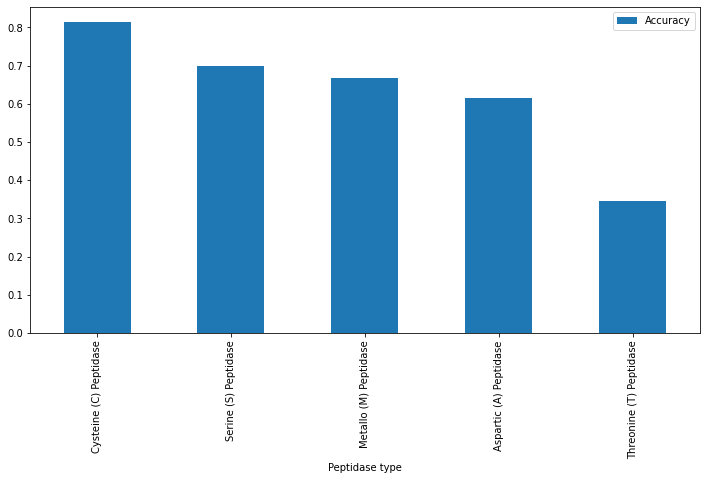

In [91]:
# View accuracy bar plot.
type_stats.plot(x = "Peptidase type",
                y = "Accuracy", 
                kind = "bar", 
                figsize = (12, 6))

<AxesSubplot:xlabel='Accuracy'>

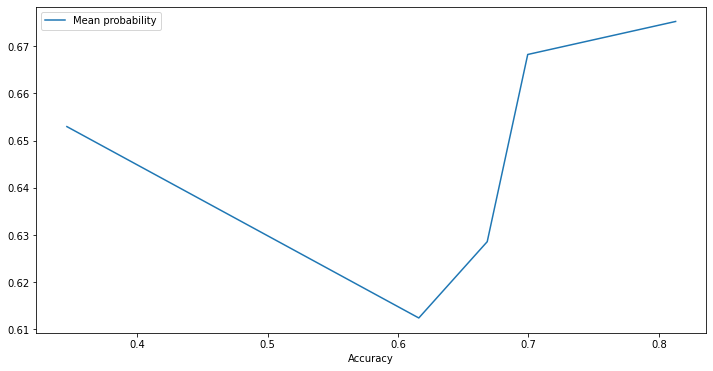

In [92]:
# View mean probability by accuracy.
type_stats.plot(x = "Accuracy",
                y = "Mean probability", 
                kind = "line", 
                figsize = (12, 6))

### Protease clan

In [85]:
# Group by peptidase clan.
df_clan = df_protease_pred.drop_duplicates(subset = ["Peptidase clan", "Sequence"]).copy()
concord_clan = df_clan[["Peptidase clan", "Concordant"]].groupby(by = "Peptidase clan").sum()
prob_clan = df_clan[["Peptidase clan", "Probability"]].groupby(by = "Peptidase clan").mean()
concord_clan["Total"] = df_clan["Peptidase clan"].value_counts()
clan_stats = concord_clan.merge(prob_clan, left_index = True, right_index = True)
clan_stats["Accuracy"] = clan_stats["Concordant"] / clan_stats["Total"]
clan_stats.columns = ["Concordant", "Total", "Mean probability", "Accuracy"]
clan_stats = clan_stats.reset_index()
clan_stats = clan_stats.sort_values(by = "Accuracy", ascending = False)
display(clan_stats)

Peptidase clan  Concordant  Total  Mean probability  Accuracy
20             ST           1      1          0.522320  1.000000
9              MP           1      1          0.678833  1.000000
4              CE           5      5          0.714277  1.000000
13             PD           1      1          0.536777  1.000000
3              CD         785    836          0.746501  0.938995
14             SB          62     70          0.660465  0.885714
2              CA        1081   1459          0.634423  0.740918
10             PA         616    872          0.675417  0.706422
6              MA         910   1346          0.628446  0.676077
0              AA         270    433          0.611908  0.623557
17             SJ           2      4          0.580521  0.500000
19             SR           1      2          0.698841  0.500000
16             SF          34     69          0.597049  0.492754
7              ME          12     32          0.610931  0.375000
11             PB          18     52          0.652953  0.346154
1              AD           1      7          0.644719  0.142857
8              MM           0      1          0.737065  0.000000
12             PC           0      1          0.582464  0.000000
5              M-           0      3          0.678224  0.000000
15             SC           0      4          0.584309  0.000000
18             SK           0      1          0.678989  0.000000

In [119]:
clan_stats_50 = clan_stats[clan_stats["Total"] >= 50].reset_index(drop = True).copy()
display(clan_stats_50)
clan_stats_50.corr()

Peptidase clan  Concordant  Total  Mean probability  Accuracy
0             CD         785    836          0.746501  0.938995
1             SB          62     70          0.660465  0.885714
2             CA        1081   1459          0.634423  0.740918
3             PA         616    872          0.675417  0.706422
4             MA         910   1346          0.628446  0.676077
5             AA         270    433          0.611908  0.623557
6             SF          34     69          0.597049  0.492754
7             PB          18     52          0.652953  0.346154

Concordant     Total  Mean probability  Accuracy
Concordant          1.000000  0.984672          0.288829  0.482181
Total               0.984672  1.000000          0.146468  0.387560
Mean probability    0.288829  0.146468          1.000000  0.604816
Accuracy            0.482181  0.387560          0.604816  1.000000

In [87]:
# Sanity check on dropping duplicates.
print(len(df_clan[df_clan["Peptidase clan"] == "CD"]))
print(len(df_clan[df_clan["Peptidase clan"] == "CD"]["Sequence"].unique()))
print(len(df_protease_pred[df_protease_pred["Peptidase clan"] == "CD"]))
print(len(df_protease_pred[df_protease_pred["Peptidase clan"] == "CD"]["Sequence"].unique()))

836
836
2558
836


In [88]:
# Compute Pearson correlation coefficients.
clan_stats.corr()

Concordant     Total  Mean probability  Accuracy
Concordant          1.000000  0.991716          0.186291  0.331630
Total               0.991716  1.000000          0.138834  0.309490
Mean probability    0.186291  0.138834          1.000000 -0.063341
Accuracy            0.331630  0.309490         -0.063341  1.000000

<AxesSubplot:xlabel='Peptidase clan'>

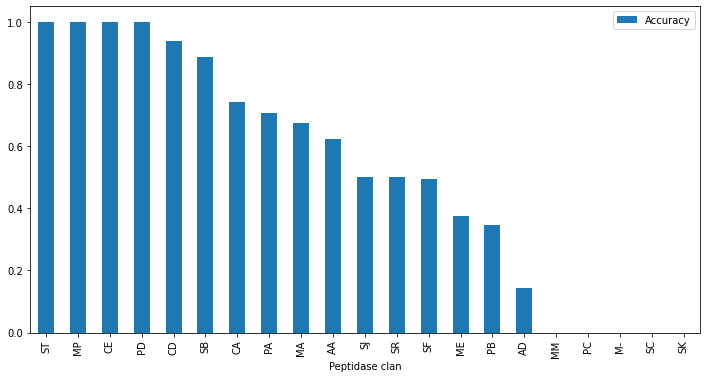

In [90]:
# View accuracy bar plot.
clan_stats.plot(x = "Peptidase clan",
                y = "Accuracy", 
                kind = "bar", 
                figsize = (12, 6))

<AxesSubplot:xlabel='Accuracy'>

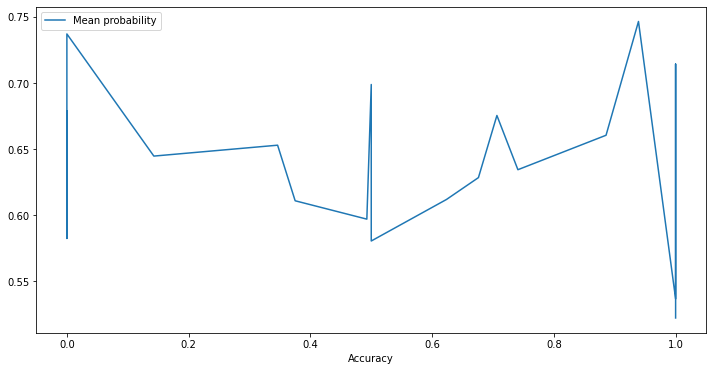

In [93]:
# View mean probability by accuracy.
clan_stats.plot(x = "Accuracy",
                y = "Mean probability", 
                kind = "line", 
                figsize = (12, 6))

### Protease family

In [94]:
# Group by peptidase family.
df_family = df_protease_pred.drop_duplicates(subset = ["Peptidase family", "Sequence"]).copy()
concord_family = df_family[["Peptidase family", "Concordant"]].groupby(by = "Peptidase family").sum()
prob_family = df_family[["Peptidase family", "Probability"]].groupby(by = "Peptidase family").mean()
concord_family["Total"] = df_family["Peptidase family"].value_counts()
family_stats = concord_family.merge(prob_family, left_index = True, right_index = True)
family_stats["Accuracy"] = family_stats["Concordant"] / family_stats["Total"]
family_stats.columns = ["Concordant", "Total", "Mean probability", "Accuracy"]
family_stats = family_stats.reset_index()
family_stats = family_stats.sort_values(by = "Accuracy", ascending = False)
display(family_stats)

Peptidase family  Concordant  Total  Mean probability  Accuracy
35               T2           1      1          0.925724  1.000000
8               C46           1      1          0.536777  1.000000
15              C85           1      1          0.661772  1.000000
14              C78           1      1          0.562374  1.000000
13              C65           1      1          0.661772  1.000000
12              C64           1      1          0.661772  1.000000
30              S54           1      1          0.522320  1.000000
22              M41           1      1          0.644085  1.000000
9               C48           5      5          0.714277  1.000000
2               A28           1      1          0.502326  1.000000
24              M67           1      1          0.678833  1.000000
5               C14         411    422          0.825123  0.973934
4               C13         388    429          0.671205  0.904429
32               S8          62     70          0.660465  0.885714
3                C1        1026   1360          0.634777  0.754412
6               C19           3      4          0.598747  0.750000
16              M10         728   1008          0.630910  0.722222
26               S1         616    872          0.675417  0.706422
0                A1         270    433          0.611908  0.623557
7                C2          56     98          0.631355  0.571429
17              M12         179    328          0.622571  0.545732
28              S16           2      4          0.580521  0.500000
21               M3           2      4          0.635415  0.500000
31              S60           1      2          0.698841  0.500000
29              S26          34     69          0.597049  0.492754
18              M13           9     19          0.625291  0.473684
19              M16          12     32          0.610931  0.375000
34               T1          17     51          0.647604  0.333333
1               A22           1      7          0.644719  0.142857
20               M2           0      1          0.504567  0.000000
11              C56           0      1          0.582464  0.000000
25              M87           0      3          0.678224  0.000000
10              C54           0      1          0.609528  0.000000
23              M50           0      1          0.737065  0.000000
33               S9           0      4          0.584309  0.000000
27              S14           0      1          0.678989  0.000000

In [120]:
family_stats_50 = family_stats[family_stats["Total"] >= 50].reset_index(drop = True).copy()
display(family_stats_50)
family_stats_50.corr()

Peptidase family  Concordant  Total  Mean probability  Accuracy
0               C14         411    422          0.825123  0.973934
1               C13         388    429          0.671205  0.904429
2                S8          62     70          0.660465  0.885714
3                C1        1026   1360          0.634777  0.754412
4               M10         728   1008          0.630910  0.722222
5                S1         616    872          0.675417  0.706422
6                A1         270    433          0.611908  0.623557
7                C2          56     98          0.631355  0.571429
8               M12         179    328          0.622571  0.545732
9               S26          34     69          0.597049  0.492754
10               T1          17     51          0.647604  0.333333

Concordant     Total  Mean probability  Accuracy
Concordant          1.000000  0.989030          0.142398  0.429300
Total               0.989030  1.000000          0.028343  0.326519
Mean probability    0.142398  0.028343          1.000000  0.636652
Accuracy            0.429300  0.326519          0.636652  1.000000

In [103]:
# Sanity check on dropping duplicates.
print(len(df_family[df_family["Peptidase family"] == "C1"]))
print(len(df_family[df_family["Peptidase family"] == "C1"]["Sequence"].unique()))
print(len(df_protease_pred[df_protease_pred["Peptidase family"] == "C1"]))
print(len(df_protease_pred[df_protease_pred["Peptidase family"] == "C1"]["Sequence"].unique()))

1360
1360
4467
1360


In [104]:
# Compute Pearson correlation coefficients.
family_stats.corr()

Concordant     Total  Mean probability  Accuracy
Concordant          1.000000  0.993927          0.126952  0.181178
Total               0.993927  1.000000          0.092919  0.157283
Mean probability    0.126952  0.092919          1.000000  0.154519
Accuracy            0.181178  0.157283          0.154519  1.000000

<AxesSubplot:xlabel='Peptidase family'>

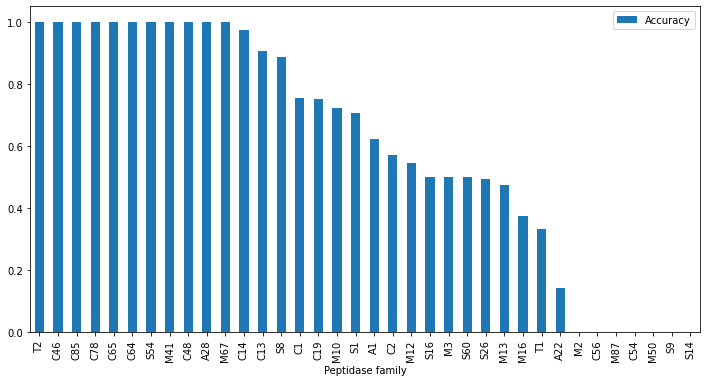

In [96]:
# View accuracy bar plot.
family_stats.plot(x = "Peptidase family",
                  y = "Accuracy", 
                  kind = "bar", 
                  figsize = (12, 6))

<AxesSubplot:xlabel='Accuracy'>

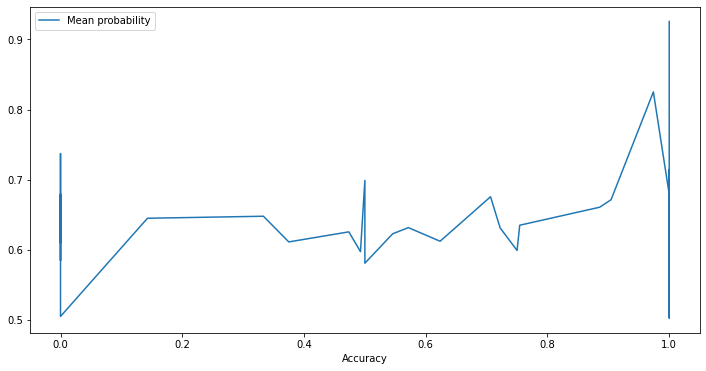

In [97]:
# View mean probability by accuracy.
family_stats.plot(x = "Accuracy",
                  y = "Mean probability", 
                  kind = "line", 
                  figsize = (12, 6))

### Protease ID

In [105]:
# Group by peptidase MEROPS ID.
df_id = df_protease_pred.drop_duplicates(subset = ["Peptidase MEROPS ID", "Sequence"]).copy()
concord_id = df_id[["Peptidase MEROPS ID", "Concordant"]].groupby(by = "Peptidase MEROPS ID").sum()
prob_id = df_id[["Peptidase MEROPS ID", "Probability"]].groupby(by = "Peptidase MEROPS ID").mean()
concord_id["Total"] = df_id["Peptidase MEROPS ID"].value_counts()
id_stats = concord_id.merge(prob_id, left_index = True, right_index = True)
id_stats["Accuracy"] = id_stats["Concordant"] / id_stats["Total"]

id_stats.columns = ["Concordant", "Total", "Mean probability", "Accuracy"]
id_stats = id_stats.reset_index()
id_stats = id_stats.sort_values(by = "Accuracy", ascending = False)
display(id_stats.head(50))
display(id_stats.tail(50))

Peptidase MEROPS ID  Concordant  Total  Mean probability  Accuracy
181             T02.004           1      1          0.925724       1.0
135             S01.199           1      1          0.514412       1.0
55              M03.006           1      1          0.674480       1.0
139             S01.214           2      2          0.830271       1.0
140             S01.215           4      4          0.724453       1.0
52              C85.008           1      1          0.661772       1.0
51              C85.007           1      1          0.661772       1.0
50              C78.002           1      1          0.562374       1.0
49              C78.001           1      1          0.562374       1.0
48              C65.001           1      1          0.661772       1.0
47              C64.004           1      1          0.661772       1.0
143             S01.218           1      1          0.667310       1.0
44              C48.008           1      1          0.774884       1.0
43              C48.002           4      4          0.699125       1.0
42              C46.004           1      1          0.536777       1.0
41              C19.034           1      1          0.661772       1.0
80              M12.214           3      3          0.649196       1.0
136             S01.211           2      2          0.727315       1.0
134             S01.198           2      2          0.610070       1.0
38              C19.013           1      1          0.661772       1.0
133             S01.194           1      1          0.669332       1.0
87              M12.241           1      1          0.534468       1.0
77              M12.018           1      1          0.578512       1.0
76              M12.016           1      1          0.531041       1.0
89              M12.301           1      1          0.647619       1.0
94              M13.090           1      1          0.671658       1.0
99              M41.006           1      1          0.644085       1.0
101             M67.002           1      1          0.678833       1.0
105             S01.020           5      5          0.646751       1.0
109             S01.034           3      3          0.638040       1.0
112             S01.079           1      1          0.891626       1.0
113             S01.081           1      1          0.886993       1.0
129             S01.174           2      2          0.522759       1.0
130             S01.189           1      1          0.761938       1.0
131             S01.192           1      1          0.545424       1.0
132             S01.193           3      3          0.561780       1.0
39              C19.016           1      1          0.533327       1.0
40              C19.017           2      2          0.634984       1.0
144             S01.223           1      1          0.776354       1.0
22              C02.007           1      1          0.790940       1.0
176             S60.001           1      1          0.727195       1.0
175             S54.009           1      1          0.522320       1.0
6               A01.070           1      1          0.646458       1.0
12              A28.004           1      1          0.502326       1.0
162             S08.063           5      5          0.627087       1.0
161             S08.039           1      1          0.608304       1.0
36              C19.001           1      1          0.661772       1.0
153             S01.257           2      2          0.737375       1.0
152             S01.252           1      1          0.705958       1.0
150             S01.247           1      1          0.891626       1.0

Peptidase MEROPS ID  Concordant  Total  Mean probability  Accuracy
155             S01.277           1      2          0.619745  0.500000
174             S26.010          34     69          0.597049  0.492754
66              M10.014          13     27          0.610835  0.481481
97              M16.003           7     15          0.599377  0.466667
81              M12.217           6     13          0.605422  0.461538
70              M10.019           4      9          0.617202  0.444444
115             S01.133          17     40          0.616112  0.425000
1               A01.003           4     10          0.601984  0.400000
68              M10.016           2      5          0.590349  0.400000
119             S01.140           9     26          0.593843  0.346154
156             S01.278           4     12          0.630437  0.333333
108             S01.033           1      3          0.704602  0.333333
179             T01.011           2      6          0.646742  0.333333
54              M03.001           1      3          0.622394  0.333333
90              M13.001           3     10          0.639535  0.300000
86              M12.225           2      7          0.633745  0.285714
83              M12.221           3     12          0.640516  0.250000
180             T01.012          10     40          0.644428  0.250000
2               A01.004           1      4          0.582922  0.250000
124             S01.153           2      9          0.686722  0.222222
114             S01.131          14     67          0.667298  0.208955
67              M10.015           1      5          0.621860  0.200000
18              C01.070           1      5          0.627242  0.200000
71              M10.024           1      5          0.588892  0.200000
96              M16.002           2     12          0.629460  0.166667
116             S01.134           1      7          0.706935  0.142857
79              M12.210           1     11          0.619571  0.090909
88              M12.244           0      1          0.511591  0.000000
170             S09.001           0      3          0.579988  0.000000
177             S60.972           0      1          0.670488  0.000000
171             S09.004           0      1          0.597270  0.000000
172             S14.003           0      1          0.678989  0.000000
78              M12.208           0      2          0.619051  0.000000
8               A22.001           0      4          0.661980  0.000000
82              M12.219           0      2          0.639468  0.000000
102             M87.001           0      3          0.678224  0.000000
10              A22.004           0      1          0.687991  0.000000
95              M13.091           0      1          0.691732  0.000000
11              A22.007           0      1          0.687991  0.000000
100             M50.001           0      1          0.737065  0.000000
72              M10.029           0      2          0.560075  0.000000
126             S01.157           0      4          0.592452  0.000000
69              M10.017           0      3          0.608193  0.000000
154             S01.258           0      1          0.594184  0.000000
122             S01.147           0      1          0.558231  0.000000
37              C19.010           0      1          0.591693  0.000000
45              C54.003           0      1          0.609528  0.000000
46              C56.002           0      1          0.582464  0.000000
53              M02.004           0      1          0.504567  0.000000
61              M10.006           0      1          0.606881  0.000000

In [138]:
id_stats_50 = id_stats[id_stats["Total"] >= 50].copy()
display(id_stats_50)
id_stats_50.corr()

Peptidase MEROPS ID  Concordant  Total  Mean probability  Accuracy
26              C14.003         117    118          0.826614  0.991525
28              C14.005         217    220          0.863474  0.986364
27              C14.004          80     84          0.778625  0.952381
103             S01.010         300    322          0.764716  0.931677
23              C13.004         387    427          0.671408  0.906323
15              C01.034         471    575          0.640337  0.819130
117             S01.135          46     58          0.620747  0.793103
13              C01.009         235    300          0.636215  0.783333
16              C01.036         313    410          0.635252  0.763415
58              M10.003         353    471          0.636280  0.749469
14              C01.032         406    543          0.633591  0.747698
17              C01.060          75    101          0.648024  0.742574
60              M10.005         337    454          0.626428  0.742291
4               A01.010         188    275          0.610118  0.683636
59              M10.004          41     62          0.668639  0.661290
3               A01.009          86    134          0.618021  0.641791
118             S01.139          86    136          0.603054  0.632353
19              C02.001          36     60          0.640357  0.600000
74              M12.004         108    183          0.625353  0.590164
73              M12.002          91    168          0.623169  0.541667
0               A01.001          40     75          0.614892  0.533333
20              C02.002          36     69          0.635298  0.521739
174             S26.010          34     69          0.597049  0.492754
114             S01.131          14     67          0.667298  0.208955

Concordant     Total  Mean probability  Accuracy
Concordant          1.000000  0.984026          0.066119  0.516563
Total               0.984026  1.000000         -0.068064  0.391316
Mean probability    0.066119 -0.068064          1.000000  0.629979
Accuracy            0.516563  0.391316          0.629979  1.000000

In [139]:
id_stats_100 = id_stats[id_stats["Total"] >= 100].copy()
display(id_stats_100)
id_stats_100.corr()

Peptidase MEROPS ID  Concordant  Total  Mean probability  Accuracy
26              C14.003         117    118          0.826614  0.991525
28              C14.005         217    220          0.863474  0.986364
103             S01.010         300    322          0.764716  0.931677
23              C13.004         387    427          0.671408  0.906323
15              C01.034         471    575          0.640337  0.819130
13              C01.009         235    300          0.636215  0.783333
16              C01.036         313    410          0.635252  0.763415
58              M10.003         353    471          0.636280  0.749469
14              C01.032         406    543          0.633591  0.747698
17              C01.060          75    101          0.648024  0.742574
60              M10.005         337    454          0.626428  0.742291
4               A01.010         188    275          0.610118  0.683636
3               A01.009          86    134          0.618021  0.641791
118             S01.139          86    136          0.603054  0.632353
74              M12.004         108    183          0.625353  0.590164
73              M12.002          91    168          0.623169  0.541667

Concordant     Total  Mean probability  Accuracy
Concordant          1.000000  0.974927         -0.021861  0.397396
Total               0.974927  1.000000         -0.200939  0.203479
Mean probability   -0.021861 -0.200939          1.000000  0.833178
Accuracy            0.397396  0.203479          0.833178  1.000000

In [106]:
# Sanity check on dropping duplicates.
print(len(df_id[df_id["Peptidase MEROPS ID"] == "S01.131"]))
print(len(df_id[df_id["Peptidase MEROPS ID"] == "S01.131"]["Sequence"].unique()))
print(len(df_protease_pred[df_protease_pred["Peptidase MEROPS ID"] == "S01.131"]))
print(len(df_protease_pred[df_protease_pred["Peptidase MEROPS ID"] == "S01.131"]["Sequence"].unique()))

67
67
143
67


In [107]:
# Compute Pearson correlation coefficients.
id_stats.corr()

Concordant     Total  Mean probability  Accuracy
Concordant          1.000000  0.991571          0.068860  0.126386
Total               0.991571  1.000000          0.033550  0.092038
Mean probability    0.068860  0.033550          1.000000  0.307172
Accuracy            0.126386  0.092038          0.307172  1.000000

<AxesSubplot:xlabel='Peptidase MEROPS ID'>

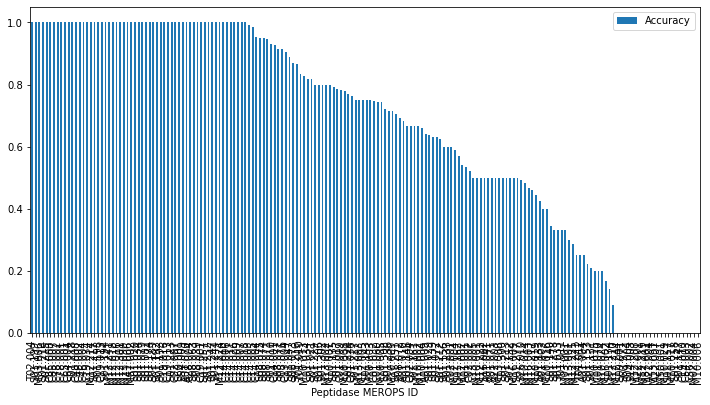

In [108]:
# View accuracy bar plot.
id_stats.plot(x = "Peptidase MEROPS ID",
              y = "Accuracy", 
              kind = "bar", 
              figsize = (12, 6))

<AxesSubplot:xlabel='Accuracy'>

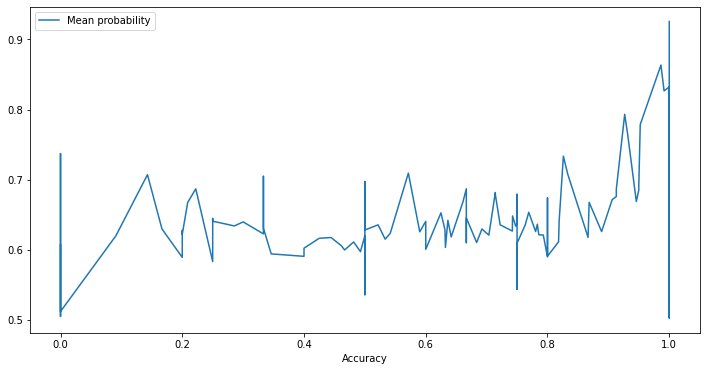

In [110]:
# View mean probability by accuracy.
id_stats.plot(x = "Accuracy",
              y = "Mean probability", 
              kind = "line", 
              figsize = (12, 6))

### Compare to DeepCleave

[https://academic.oup.com/bioinformatics/article/36/4/1057/5578482](https://academic.oup.com/bioinformatics/article/36/4/1057/5578482)

[Supplements](https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/bioinformatics/36/4/10.1093_bioinformatics_btz721/3/btz721_supplementary_data.pdf?Expires=1661457901&Signature=RAhLo-upaWAHArSf2qeelUJUdyzSCyqTnPiPNK4JW8QgCSJe1Kc6CHm1xnPBcIrybpbfkkjxogSUQ8SGU~8EiSJIoa6CEqEcnWXwPULjVgHgd3O3-Rw1vB7-1B4hnSvsShI4hEWgvl3HciAFGOKgYZ3vgM3YX77Du62rwMz59JfWw5yV4LMbSxUlhSb4tFTPorHErkcMiPzaroGhK8aG6xMj11VrObWydSkqUdXwX-RDrHuX31~LIvDbQUkRO1bY0HFZPXdxYIUOJKA1v1Fxy7qsroPiCPBSQ4~46nPW9H5w83Ox6h99~rDKNRxp4O1JP1We61yErZU8EgSqqO5o7g__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA)

- caspase-1: C14.001
- caspase-3: C14.003
- caspase-6: C14.005
- matrix metallopeptidase-2: M10.003
- matrix metallopeptidase-9: M10.004
- matrix metallopeptidase-7: M10.008

In [141]:
# Compare performance to DeepCleave.
deepcleave_proteases = ["C14.001", "C14.003", "C14.004", "C14.005", "C14.006", 
                        "M10.002", "M10.003", "M10.004", "M10.005", "M10.008", "M10.009", "M10.014",]
all_dfs = []
for protease in deepcleave_proteases:
    df = (id_stats[id_stats["Peptidase MEROPS ID"] == protease])
    all_dfs.append(df)
    
df_deepcleave_comparison = pd.concat(all_dfs)
display(df_deepcleave_comparison)
df_deepcleave_comparison.corr()

Peptidase MEROPS ID  Concordant  Total  Mean probability  Accuracy
25             C14.001          38     41          0.793113  0.926829
26             C14.003         117    118          0.826614  0.991525
27             C14.004          80     84          0.778625  0.952381
28             C14.005         217    220          0.863474  0.986364
29             C14.006          44     44          0.861278  1.000000
57             M10.002          10     15          0.686838  0.666667
58             M10.003         353    471          0.636280  0.749469
59             M10.004          41     62          0.668639  0.661290
60             M10.005         337    454          0.626428  0.742291
63             M10.008          32     41          0.625742  0.780488
64             M10.009          25     35          0.681460  0.714286
66             M10.014          13     27          0.610835  0.481481

Concordant     Total  Mean probability  Accuracy
Concordant          1.000000  0.990336         -0.104088  0.139628
Total               0.990336  1.000000         -0.220061  0.034547
Mean probability   -0.104088 -0.220061          1.000000  0.878226
Accuracy            0.139628  0.034547          0.878226  1.000000

In [134]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score

deepcleave_proteases = ["C14.001", "C14.003", "C14.004", "C14.005", "C14.006", 
                        "M10.002", "M10.003", "M10.004", "M10.005", "M10.008", "M10.008", "M10.014"]
protease_dfs = []
for protease in deepcleave_proteases:
    print(protease, "\n")
    df = df_protease_pred[df_protease_pred["Peptidase MEROPS ID"] == protease].copy()
    print("TRUE:\n", df.Label.value_counts())
    print("PRED:\n", df.Prediction.value_counts())
    df = df.drop_duplicates(subset = ["Peptidase MEROPS ID", "Sequence"])
    acc = accuracy_score(df["Label"], df["Prediction"])
    try:
        prec = precision_score(df["Label"], df["Prediction"])
    except:
        prec = None
    try:
        rec = recall_score(df["Label"], df["Prediction"])
    except:
        rec = None
    try:
        roc = roc_auc_score(df["Label"], df["Prediction"])
    except:
        roc = None
    df2 = pd.DataFrame({"Protease": [protease],
                        "Accuracy": [acc],
                        "Precision": [prec],
                        "Recall": [rec],
                        "ROC AUC": [roc]})
    protease_dfs.append(df2)
    
df_deepcleave_comparison2 = pd.concat(protease_dfs)
display(df_deepcleave_comparison2)

C14.001 

TRUE:
 Positive    335
Name: Label, dtype: int64
PRED:
 Positive    332
Negative      3
Name: Prediction, dtype: int64
C14.003 

TRUE:
 Positive    699
Name: Label, dtype: int64
PRED:
 Positive    698
Negative      1
Name: Prediction, dtype: int64
C14.004 

TRUE:
 Positive    432
Name: Label, dtype: int64
PRED:
 Positive    425
Negative      7
Name: Prediction, dtype: int64
C14.005 

TRUE:
 Positive    361
Name: Label, dtype: int64
PRED:
 Positive    358
Negative      3
Name: Prediction, dtype: int64
C14.006 

TRUE:
 Positive    138
Name: Label, dtype: int64
PRED:
 Positive    138
Name: Prediction, dtype: int64
M10.002 

TRUE:
 Positive    70
Name: Label, dtype: int64
PRED:
 Positive    48
Negative    22
Name: Prediction, dtype: int64
M10.003 

TRUE:
 Positive    1464
Name: Label, dtype: int64
PRED:
 Positive    1207
Negative     257
Name: Prediction, dtype: int64
M10.004 

TRUE:
 Positive    187
Name: Label, dtype: int64
PRED:
 Positive    109
Negative     78
Name: Predictio

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is 

Protease  Accuracy Precision Recall ROC AUC
0  C14.001  0.926829      None   None    None
0  C14.003  0.991525      None   None    None
0  C14.004  0.952381      None   None    None
0  C14.005  0.986364      None   None    None
0  C14.006  1.000000       0.0    0.0    None
0  M10.002  0.666667      None   None    None
0  M10.003  0.749469      None   None    None
0  M10.004  0.661290      None   None    None
0  M10.005  0.742291      None   None    None
0  M10.008  0.780488      None   None    None
0  M10.008  0.780488      None   None    None
0  M10.014  0.481481      None   None    None

In [131]:
print("PREDICTED LABELS")
print(df_protease_pred["Prediction"].value_counts())
print(df_protease_pred["Prediction"].value_counts(normalize = True))

print("\nTRUE LABELS")
print(df_protease_pred["Label"].value_counts())
print(df_protease_pred["Label"].value_counts(normalize = True))

PREDICTED LABELS
Positive    13603
Negative     4121
Name: Prediction, dtype: int64
Positive    0.76749
Negative    0.23251
Name: Prediction, dtype: float64

TRUE LABELS
Positive    17724
Name: Label, dtype: int64
Positive    1.0
Name: Label, dtype: float64


## Export data

In [142]:
setwd("/Users/jacquelinemaasch/Desktop/machineBiology/pancleave_dev_2/data_files/_final_merged_predictions_groundtruth/_accuracy_by_protease")

type_stats.to_csv("protease_type_accuracy.csv", index = False)
clan_stats.to_csv("protease_clan_accuracy.csv", index = False)
family_stats.to_csv("protease_family_accuracy.csv", index = False)
id_stats.to_csv("protease_merops_id_accuracy.csv", index = False)

df_deepcleave_comparison.to_csv("deepcleave_comparison.csv", index = False)

clan_stats_50.to_csv("protease_merops_clan_50_accuracy.csv", index = False)
family_stats_50.to_csv("protease_merops_family_50_accuracy.csv", index = False)
id_stats_50.to_csv("protease_merops_id_50_accuracy.csv", index = False)
id_stats_100.to_csv("protease_merops_id_100_accuracy.csv", index = False)

### End of document